In [ ]:
## Features to check
# what is the trend for number of rides per day?  Is it cyclical?  Is there a trend that indicates certain days are different than others?
# On day of the week, is there a difference in user usage?
# Are there differences in user usage based on major events (ie baseball games, etc).
# On features that show differences, are there cost per mile differences

# Need to calculate a cost per mile column as a metric
# Does usage rate effect price?


In [2]:
import vaex as vx
import numpy as np

In [5]:
import pandas as pd

In [208]:
df = vx.from_csv("D:\Data Science\Rideshare\Transportation_Network_Providers_-_Trips.csv", convert=True, chunk_size=5_000_000)
df.head()

#,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
<i style='opacity: 0.6'>0</i>,c270e7aa445974de59f845e2a0ebc9dc6b84c403,06/23/2019 12:30:00 PM,06/23/2019 01:00:00 PM,1745,8.2,nan,nan,21,28,25,3,2.55,30.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.874,-87.6635,POINT (-87.6635175498 41.874005383)
<i style='opacity: 0.6'>1</i>,c270e7f286fe731c522a12fc3fa24f3a676e1c09,04/07/2019 11:30:00 PM,04/07/2019 11:30:00 PM,235,0.6,1.70313e+10,1.70318e+10,32,32,2.5,0,2.55,5.05,False,1,41.885,-87.621,POINT (-87.6209929134 41.8849871918),41.881,-87.6327,POINT (-87.6327464887 41.8809944707)
<i style='opacity: 0.6'>2</i>,c270e931c25608efe6a40626e9923b2b269b7bc6,06/25/2019 02:45:00 PM,06/25/2019 03:00:00 PM,1143,3.6,1.70318e+10,1.70313e+10,7,32,10,0,2.55,12.55,False,1,41.9147,-87.654,POINT (-87.6540070286 41.9147473049),41.885,-87.621,POINT (-87.6209929134 41.8849871918)
<i style='opacity: 0.6'>3</i>,c270ea6b9bb98ebc5efa7e05d82bd47576551db1,05/03/2019 08:45:00 PM,05/03/2019 09:00:00 PM,1510,6.5,nan,nan,21,30,15,0,2.55,17.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.8391,-87.714,POINT (-87.714003807 41.8390869059)
<i style='opacity: 0.6'>4</i>,c270eaf3ac453fcdfe5f78e307d082c871fa89df,04/25/2019 12:15:00 AM,04/25/2019 12:30:00 AM,450,1.8,nan,nan,41,41,5,1,2.55,8.55,True,1,41.7941,-87.5923,POINT (-87.592310855 41.794090253),41.7941,-87.5923,POINT (-87.592310855 41.794090253)
<i style='opacity: 0.6'>5</i>,c270eb7d79ce5d61c85f75e461164990a985d3bf,06/11/2019 06:00:00 PM,06/11/2019 07:00:00 PM,3038,17.2,1.70318e+10,1.70314e+10,13,42,30,0,2.55,32.55,False,1,41.9783,-87.7164,POINT (-87.7164304157 41.9782942489),41.7831,-87.6084,POINT (-87.6084265019 41.7831007248)
<i style='opacity: 0.6'>6</i>,c270ebb2b854a6d8965fc204d43a23ee5c0e8a47,06/11/2019 09:00:00 PM,06/11/2019 09:00:00 PM,731,3.7,nan,nan,5,24,7.5,0,0,7.5,True,1,41.9478,-87.6838,POINT (-87.6838349425 41.9477915865),41.9012,-87.6764,POINT (-87.6763559892 41.9012069941)
<i style='opacity: 0.6'>7</i>,c270ebe07d287879ada954b923b30c9fe7fce383,05/13/2019 06:30:00 AM,05/13/2019 06:45:00 AM,1001,4.9,nan,nan,31,58,10,0,2.55,12.55,False,1,41.8503,-87.6676,POINT (-87.667569312 41.8502663663),41.8174,-87.6989,POINT (-87.6988607973 41.8173662079)
<i style='opacity: 0.6'>8</i>,c270ec073e3a63e530b380f7ecc73c48d09336f2,05/16/2019 03:00:00 PM,05/16/2019 03:45:00 PM,2725,27.8,nan,1.7032e+10,nan,76,37.5,7,10.36,54.86,False,1,nan,nan,None,41.9791,-87.903,POINT (-87.9030396611 41.9790708201)
<i style='opacity: 0.6'>9</i>,c270ec3719c8a82d878f72b26e3e5e3b3c7d55ce,04/22/2019 08:45:00 PM,04/22/2019 09:00:00 PM,370,1.3,nan,nan,28,31,5,3,2.55,10.55,False,1,41.874,-87.6635,POINT (-87.6635175498 41.874005383),41.8503,-87.6676,POINT (-87.667569312 41.8502663663)


In [209]:
df.dtypes

Trip ID                       <class 'str'>
Trip Start Timestamp          <class 'str'>
Trip End Timestamp            <class 'str'>
Trip Seconds                        float64
Trip Miles                          float64
Pickup Census Tract                 float64
Dropoff Census Tract                float64
Pickup Community Area               float64
Dropoff Community Area              float64
Fare                                float64
Tip                                 float64
Additional Charges                  float64
Trip Total                          float64
Shared Trip Authorized                 bool
Trips Pooled                          int64
Pickup Centroid Latitude            float64
Pickup Centroid Longitude           float64
Pickup Centroid Location      <class 'str'>
Dropoff Centroid Latitude           float64
Dropoff Centroid Longitude          float64
Dropoff Centroid Location     <class 'str'>
dtype: object

In [210]:
x = df['Trip Start Timestamp'][0:1]
x

Expression = Trip_Start_Timestamp
Length: 1 dtype: str (expression)
---------------------------------
0  06/23/2019 12:30:00 PM

In [211]:
x.str.slice(0,2) + '-' + x.str.slice(11,13)

Expression = str_cat(str_cat(str_slice(Trip_Start_Timestamp, 0, 2), '-...
Length: 1 dtype: str (expression)
---------------------------------
0  06-12

In [212]:
df['Trip Start Date'] = df['Trip Start Timestamp'].apply(lambda x: x[0:11])

In [213]:
df.head()

#,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Date
<i style='opacity: 0.6'>0</i>,c270e7aa445974de59f845e2a0ebc9dc6b84c403,06/23/2019 12:30:00 PM,06/23/2019 01:00:00 PM,1745,8.2,nan,nan,21,28,25,3,2.55,30.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.874,-87.6635,POINT (-87.6635175498 41.874005383),06/23/2019
<i style='opacity: 0.6'>1</i>,c270e7f286fe731c522a12fc3fa24f3a676e1c09,04/07/2019 11:30:00 PM,04/07/2019 11:30:00 PM,235,0.6,1.70313e+10,1.70318e+10,32,32,2.5,0,2.55,5.05,False,1,41.885,-87.621,POINT (-87.6209929134 41.8849871918),41.881,-87.6327,POINT (-87.6327464887 41.8809944707),04/07/2019
<i style='opacity: 0.6'>2</i>,c270e931c25608efe6a40626e9923b2b269b7bc6,06/25/2019 02:45:00 PM,06/25/2019 03:00:00 PM,1143,3.6,1.70318e+10,1.70313e+10,7,32,10,0,2.55,12.55,False,1,41.9147,-87.654,POINT (-87.6540070286 41.9147473049),41.885,-87.621,POINT (-87.6209929134 41.8849871918),06/25/2019
<i style='opacity: 0.6'>3</i>,c270ea6b9bb98ebc5efa7e05d82bd47576551db1,05/03/2019 08:45:00 PM,05/03/2019 09:00:00 PM,1510,6.5,nan,nan,21,30,15,0,2.55,17.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.8391,-87.714,POINT (-87.714003807 41.8390869059),05/03/2019
<i style='opacity: 0.6'>4</i>,c270eaf3ac453fcdfe5f78e307d082c871fa89df,04/25/2019 12:15:00 AM,04/25/2019 12:30:00 AM,450,1.8,nan,nan,41,41,5,1,2.55,8.55,True,1,41.7941,-87.5923,POINT (-87.592310855 41.794090253),41.7941,-87.5923,POINT (-87.592310855 41.794090253),04/25/2019
<i style='opacity: 0.6'>5</i>,c270eb7d79ce5d61c85f75e461164990a985d3bf,06/11/2019 06:00:00 PM,06/11/2019 07:00:00 PM,3038,17.2,1.70318e+10,1.70314e+10,13,42,30,0,2.55,32.55,False,1,41.9783,-87.7164,POINT (-87.7164304157 41.9782942489),41.7831,-87.6084,POINT (-87.6084265019 41.7831007248),06/11/2019
<i style='opacity: 0.6'>6</i>,c270ebb2b854a6d8965fc204d43a23ee5c0e8a47,06/11/2019 09:00:00 PM,06/11/2019 09:00:00 PM,731,3.7,nan,nan,5,24,7.5,0,0,7.5,True,1,41.9478,-87.6838,POINT (-87.6838349425 41.9477915865),41.9012,-87.6764,POINT (-87.6763559892 41.9012069941),06/11/2019
<i style='opacity: 0.6'>7</i>,c270ebe07d287879ada954b923b30c9fe7fce383,05/13/2019 06:30:00 AM,05/13/2019 06:45:00 AM,1001,4.9,nan,nan,31,58,10,0,2.55,12.55,False,1,41.8503,-87.6676,POINT (-87.667569312 41.8502663663),41.8174,-87.6989,POINT (-87.6988607973 41.8173662079),05/13/2019
<i style='opacity: 0.6'>8</i>,c270ec073e3a63e530b380f7ecc73c48d09336f2,05/16/2019 03:00:00 PM,05/16/2019 03:45:00 PM,2725,27.8,nan,1.7032e+10,nan,76,37.5,7,10.36,54.86,False,1,nan,nan,None,41.9791,-87.903,POINT (-87.9030396611 41.9790708201),05/16/2019
<i style='opacity: 0.6'>9</i>,c270ec3719c8a82d878f72b26e3e5e3b3c7d55ce,04/22/2019 08:45:00 PM,04/22/2019 09:00:00 PM,370,1.3,nan,nan,28,31,5,3,2.55,10.55,False,1,41.874,-87.6635,POINT (-87.6635175498 41.874005383),41.8503,-87.6676,POINT (-87.667569312 41.8502663663),04/22/2019


In [214]:
# df['Trip Start Date'] = df['Trip Start Timestamp'].apply(lambda x:  x.str.slice(6, 10) + '-' + x.str.slice(0, 2) + '-' + x.str.slice(3, 5) + '-' +  + 'T' + x.str.slice(11, 13) + ':' + x.str.slice(14, 16) + ':' + x.str.slice(17, 19))
df['Trip Start Date'] = df['Trip Start Date'].apply(lambda x: x[6:10] + '-' + x[0:2] + '-' + x[3:5])

In [215]:
df.dtypes

Trip ID                       <class 'str'>
Trip Start Timestamp          <class 'str'>
Trip End Timestamp            <class 'str'>
Trip Seconds                        float64
Trip Miles                          float64
Pickup Census Tract                 float64
Dropoff Census Tract                float64
Pickup Community Area               float64
Dropoff Community Area              float64
Fare                                float64
Tip                                 float64
Additional Charges                  float64
Trip Total                          float64
Shared Trip Authorized                 bool
Trips Pooled                          int64
Pickup Centroid Latitude            float64
Pickup Centroid Longitude           float64
Pickup Centroid Location      <class 'str'>
Dropoff Centroid Latitude           float64
Dropoff Centroid Longitude          float64
Dropoff Centroid Location     <class 'str'>
Trip Start Date               <class 'str'>
dtype: object

In [216]:
df.head()

#,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Date
<i style='opacity: 0.6'>0</i>,c270e7aa445974de59f845e2a0ebc9dc6b84c403,06/23/2019 12:30:00 PM,06/23/2019 01:00:00 PM,1745,8.2,nan,nan,21,28,25,3,2.55,30.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.874,-87.6635,POINT (-87.6635175498 41.874005383),2019-06-23
<i style='opacity: 0.6'>1</i>,c270e7f286fe731c522a12fc3fa24f3a676e1c09,04/07/2019 11:30:00 PM,04/07/2019 11:30:00 PM,235,0.6,1.70313e+10,1.70318e+10,32,32,2.5,0,2.55,5.05,False,1,41.885,-87.621,POINT (-87.6209929134 41.8849871918),41.881,-87.6327,POINT (-87.6327464887 41.8809944707),2019-04-07
<i style='opacity: 0.6'>2</i>,c270e931c25608efe6a40626e9923b2b269b7bc6,06/25/2019 02:45:00 PM,06/25/2019 03:00:00 PM,1143,3.6,1.70318e+10,1.70313e+10,7,32,10,0,2.55,12.55,False,1,41.9147,-87.654,POINT (-87.6540070286 41.9147473049),41.885,-87.621,POINT (-87.6209929134 41.8849871918),2019-06-25
<i style='opacity: 0.6'>3</i>,c270ea6b9bb98ebc5efa7e05d82bd47576551db1,05/03/2019 08:45:00 PM,05/03/2019 09:00:00 PM,1510,6.5,nan,nan,21,30,15,0,2.55,17.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.8391,-87.714,POINT (-87.714003807 41.8390869059),2019-05-03
<i style='opacity: 0.6'>4</i>,c270eaf3ac453fcdfe5f78e307d082c871fa89df,04/25/2019 12:15:00 AM,04/25/2019 12:30:00 AM,450,1.8,nan,nan,41,41,5,1,2.55,8.55,True,1,41.7941,-87.5923,POINT (-87.592310855 41.794090253),41.7941,-87.5923,POINT (-87.592310855 41.794090253),2019-04-25
<i style='opacity: 0.6'>5</i>,c270eb7d79ce5d61c85f75e461164990a985d3bf,06/11/2019 06:00:00 PM,06/11/2019 07:00:00 PM,3038,17.2,1.70318e+10,1.70314e+10,13,42,30,0,2.55,32.55,False,1,41.9783,-87.7164,POINT (-87.7164304157 41.9782942489),41.7831,-87.6084,POINT (-87.6084265019 41.7831007248),2019-06-11
<i style='opacity: 0.6'>6</i>,c270ebb2b854a6d8965fc204d43a23ee5c0e8a47,06/11/2019 09:00:00 PM,06/11/2019 09:00:00 PM,731,3.7,nan,nan,5,24,7.5,0,0,7.5,True,1,41.9478,-87.6838,POINT (-87.6838349425 41.9477915865),41.9012,-87.6764,POINT (-87.6763559892 41.9012069941),2019-06-11
<i style='opacity: 0.6'>7</i>,c270ebe07d287879ada954b923b30c9fe7fce383,05/13/2019 06:30:00 AM,05/13/2019 06:45:00 AM,1001,4.9,nan,nan,31,58,10,0,2.55,12.55,False,1,41.8503,-87.6676,POINT (-87.667569312 41.8502663663),41.8174,-87.6989,POINT (-87.6988607973 41.8173662079),2019-05-13
<i style='opacity: 0.6'>8</i>,c270ec073e3a63e530b380f7ecc73c48d09336f2,05/16/2019 03:00:00 PM,05/16/2019 03:45:00 PM,2725,27.8,nan,1.7032e+10,nan,76,37.5,7,10.36,54.86,False,1,nan,nan,None,41.9791,-87.903,POINT (-87.9030396611 41.9790708201),2019-05-16
<i style='opacity: 0.6'>9</i>,c270ec3719c8a82d878f72b26e3e5e3b3c7d55ce,04/22/2019 08:45:00 PM,04/22/2019 09:00:00 PM,370,1.3,nan,nan,28,31,5,3,2.55,10.55,False,1,41.874,-87.6635,POINT (-87.6635175498 41.874005383),41.8503,-87.6676,POINT (-87.667569312 41.8502663663),2019-04-22


In [217]:
from datetime import datetime

start = datetime.now()

In [220]:
daily_trips = df['Trip Start Date'].value_counts().reset_index().sort_values(by="index")

In [221]:
daily_trips

,index,0
227,2018-11-01,287967
104,2018-11-02,340074
54,2018-11-03,377623
178,2018-11-04,302315
387,2018-11-05,244772
...,...,...
327,2019-12-27,261772
213,2019-12-28,292073
385,2019-12-29,246370
355,2019-12-30,255826


In [222]:
end = datetime.now()

print(f"the process took {end - start} minutes")

the process took 0:11:27.675215 minutes


In [223]:
daily_trips.columns=['date', 'count']

In [224]:
daily_trips.head()

,date,count
227,2018-11-01,287967
104,2018-11-02,340074
54,2018-11-03,377623
178,2018-11-04,302315
387,2018-11-05,244772


INFO:MainThread:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:MainThread:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 426 artists>

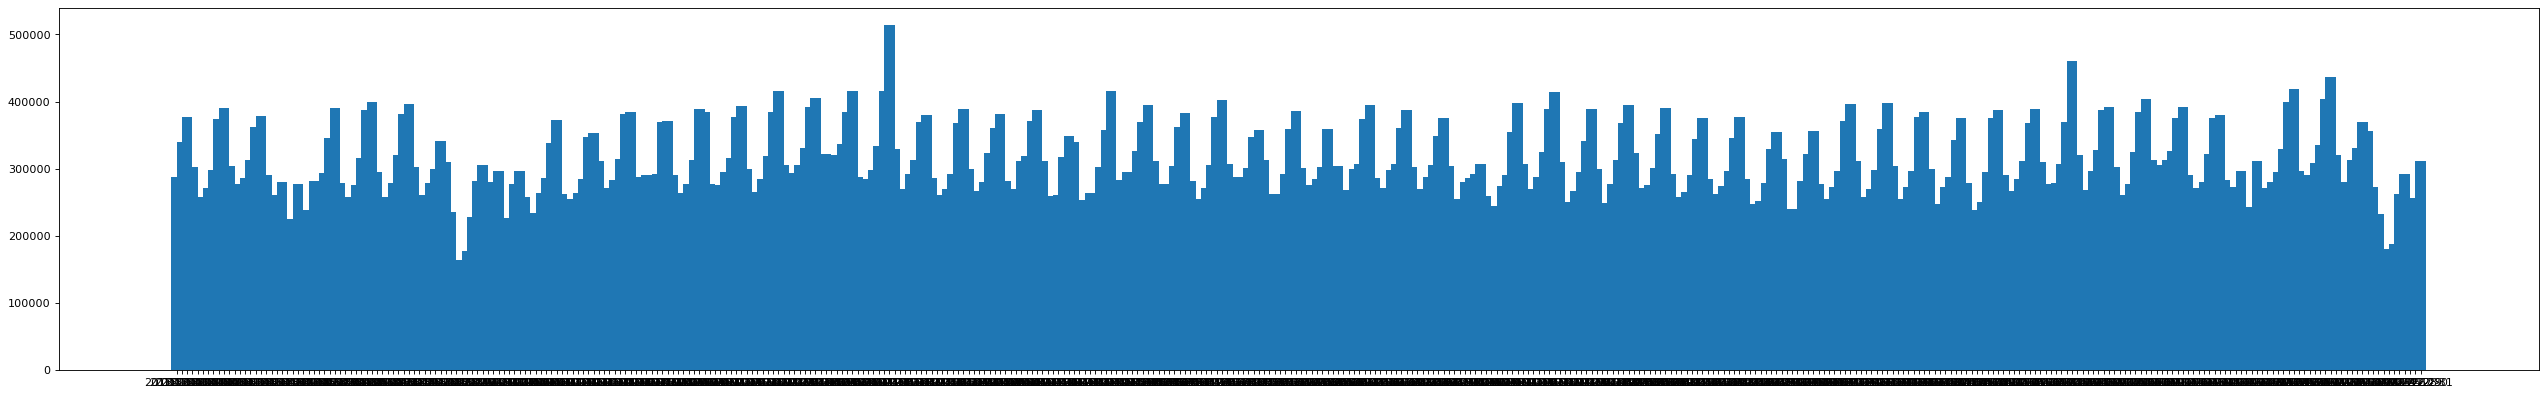

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 6), dpi=80)

plt.bar(x=daily_trips['date'], height=daily_trips['count'], width=2)

<AxesSubplot:>

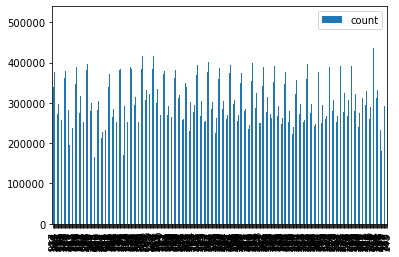

In [226]:
daily_trips.plot.bar()

INFO:MainThread:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:MainThread:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 14 artists>

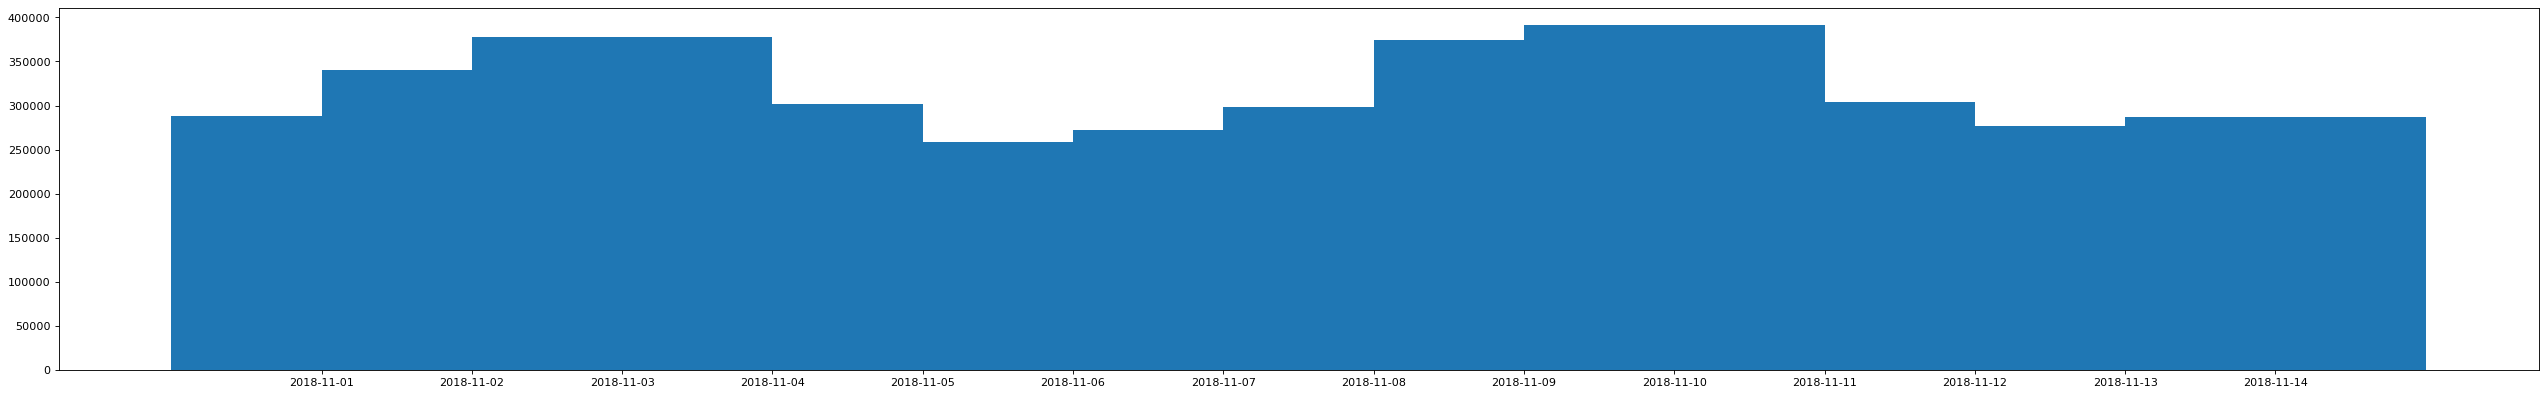

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 6), dpi=80)

plt.bar(x=daily_trips['date'][0:14], height=daily_trips['count'][0:14], width=2)

In [ ]:
# shows a weekly pattern

In [234]:
# how to convert to datetime

from datetime import datetime

# Dateframe format:  06/23/2019 12:30:00 PM
def convert_to_datetime(date_string):
    return datetime.strptime(date_string, "%m/%d/%Y %I:%M:%S %p")

df['Trip Start Datetime']  = df['Trip Start Timestamp'].apply(convert_to_datetime)

In [235]:
df.head()

#,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Date,Trip Start Datetime
<i style='opacity: 0.6'>0</i>,c270e7aa445974de59f845e2a0ebc9dc6b84c403,06/23/2019 12:30:00 PM,06/23/2019 01:00:00 PM,1745,8.2,nan,nan,21,28,25,3,2.55,30.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.874,-87.6635,POINT (-87.6635175498 41.874005383),2019-06-23,2019-06-23 12:30:00
<i style='opacity: 0.6'>1</i>,c270e7f286fe731c522a12fc3fa24f3a676e1c09,04/07/2019 11:30:00 PM,04/07/2019 11:30:00 PM,235,0.6,1.70313e+10,1.70318e+10,32,32,2.5,0,2.55,5.05,False,1,41.885,-87.621,POINT (-87.6209929134 41.8849871918),41.881,-87.6327,POINT (-87.6327464887 41.8809944707),2019-04-07,2019-04-07 23:30:00
<i style='opacity: 0.6'>2</i>,c270e931c25608efe6a40626e9923b2b269b7bc6,06/25/2019 02:45:00 PM,06/25/2019 03:00:00 PM,1143,3.6,1.70318e+10,1.70313e+10,7,32,10,0,2.55,12.55,False,1,41.9147,-87.654,POINT (-87.6540070286 41.9147473049),41.885,-87.621,POINT (-87.6209929134 41.8849871918),2019-06-25,2019-06-25 14:45:00
<i style='opacity: 0.6'>3</i>,c270ea6b9bb98ebc5efa7e05d82bd47576551db1,05/03/2019 08:45:00 PM,05/03/2019 09:00:00 PM,1510,6.5,nan,nan,21,30,15,0,2.55,17.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.8391,-87.714,POINT (-87.714003807 41.8390869059),2019-05-03,2019-05-03 20:45:00
<i style='opacity: 0.6'>4</i>,c270eaf3ac453fcdfe5f78e307d082c871fa89df,04/25/2019 12:15:00 AM,04/25/2019 12:30:00 AM,450,1.8,nan,nan,41,41,5,1,2.55,8.55,True,1,41.7941,-87.5923,POINT (-87.592310855 41.794090253),41.7941,-87.5923,POINT (-87.592310855 41.794090253),2019-04-25,2019-04-25 00:15:00
<i style='opacity: 0.6'>5</i>,c270eb7d79ce5d61c85f75e461164990a985d3bf,06/11/2019 06:00:00 PM,06/11/2019 07:00:00 PM,3038,17.2,1.70318e+10,1.70314e+10,13,42,30,0,2.55,32.55,False,1,41.9783,-87.7164,POINT (-87.7164304157 41.9782942489),41.7831,-87.6084,POINT (-87.6084265019 41.7831007248),2019-06-11,2019-06-11 18:00:00
<i style='opacity: 0.6'>6</i>,c270ebb2b854a6d8965fc204d43a23ee5c0e8a47,06/11/2019 09:00:00 PM,06/11/2019 09:00:00 PM,731,3.7,nan,nan,5,24,7.5,0,0,7.5,True,1,41.9478,-87.6838,POINT (-87.6838349425 41.9477915865),41.9012,-87.6764,POINT (-87.6763559892 41.9012069941),2019-06-11,2019-06-11 21:00:00
<i style='opacity: 0.6'>7</i>,c270ebe07d287879ada954b923b30c9fe7fce383,05/13/2019 06:30:00 AM,05/13/2019 06:45:00 AM,1001,4.9,nan,nan,31,58,10,0,2.55,12.55,False,1,41.8503,-87.6676,POINT (-87.667569312 41.8502663663),41.8174,-87.6989,POINT (-87.6988607973 41.8173662079),2019-05-13,2019-05-13 06:30:00
<i style='opacity: 0.6'>8</i>,c270ec073e3a63e530b380f7ecc73c48d09336f2,05/16/2019 03:00:00 PM,05/16/2019 03:45:00 PM,2725,27.8,nan,1.7032e+10,nan,76,37.5,7,10.36,54.86,False,1,nan,nan,None,41.9791,-87.903,POINT (-87.9030396611 41.9790708201),2019-05-16,2019-05-16 15:00:00
<i style='opacity: 0.6'>9</i>,c270ec3719c8a82d878f72b26e3e5e3b3c7d55ce,04/22/2019 08:45:00 PM,04/22/2019 09:00:00 PM,370,1.3,nan,nan,28,31,5,3,2.55,10.55,False,1,41.874,-87.6635,POINT (-87.6635175498 41.874005383),41.8503,-87.6676,POINT (-87.667569312 41.8502663663),2019-04-22,2019-04-22 20:45:00


In [238]:
# Dateframe format:  06/23/2019 12:30:00 PM
def convert_to_datetime(date_as_datetime):
    return datetime.strftime(date_as_datetime, "%a")

df['day_week']  = df['Trip Start Datetime'].apply(convert_to_datetime)

In [239]:
df.head()

#,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Date,Trip Start Datetime,day_week
<i style='opacity: 0.6'>0</i>,c270e7aa445974de59f845e2a0ebc9dc6b84c403,06/23/2019 12:30:00 PM,06/23/2019 01:00:00 PM,1745,8.2,nan,nan,21,28,25,3,2.55,30.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.874,-87.6635,POINT (-87.6635175498 41.874005383),2019-06-23,2019-06-23 12:30:00,Sun
<i style='opacity: 0.6'>1</i>,c270e7f286fe731c522a12fc3fa24f3a676e1c09,04/07/2019 11:30:00 PM,04/07/2019 11:30:00 PM,235,0.6,1.70313e+10,1.70318e+10,32,32,2.5,0,2.55,5.05,False,1,41.885,-87.621,POINT (-87.6209929134 41.8849871918),41.881,-87.6327,POINT (-87.6327464887 41.8809944707),2019-04-07,2019-04-07 23:30:00,Sun
<i style='opacity: 0.6'>2</i>,c270e931c25608efe6a40626e9923b2b269b7bc6,06/25/2019 02:45:00 PM,06/25/2019 03:00:00 PM,1143,3.6,1.70318e+10,1.70313e+10,7,32,10,0,2.55,12.55,False,1,41.9147,-87.654,POINT (-87.6540070286 41.9147473049),41.885,-87.621,POINT (-87.6209929134 41.8849871918),2019-06-25,2019-06-25 14:45:00,Tue
<i style='opacity: 0.6'>3</i>,c270ea6b9bb98ebc5efa7e05d82bd47576551db1,05/03/2019 08:45:00 PM,05/03/2019 09:00:00 PM,1510,6.5,nan,nan,21,30,15,0,2.55,17.55,False,1,41.9387,-87.7112,POINT (-87.7112105933 41.9386661962),41.8391,-87.714,POINT (-87.714003807 41.8390869059),2019-05-03,2019-05-03 20:45:00,Fri
<i style='opacity: 0.6'>4</i>,c270eaf3ac453fcdfe5f78e307d082c871fa89df,04/25/2019 12:15:00 AM,04/25/2019 12:30:00 AM,450,1.8,nan,nan,41,41,5,1,2.55,8.55,True,1,41.7941,-87.5923,POINT (-87.592310855 41.794090253),41.7941,-87.5923,POINT (-87.592310855 41.794090253),2019-04-25,2019-04-25 00:15:00,Thu
<i style='opacity: 0.6'>5</i>,c270eb7d79ce5d61c85f75e461164990a985d3bf,06/11/2019 06:00:00 PM,06/11/2019 07:00:00 PM,3038,17.2,1.70318e+10,1.70314e+10,13,42,30,0,2.55,32.55,False,1,41.9783,-87.7164,POINT (-87.7164304157 41.9782942489),41.7831,-87.6084,POINT (-87.6084265019 41.7831007248),2019-06-11,2019-06-11 18:00:00,Tue
<i style='opacity: 0.6'>6</i>,c270ebb2b854a6d8965fc204d43a23ee5c0e8a47,06/11/2019 09:00:00 PM,06/11/2019 09:00:00 PM,731,3.7,nan,nan,5,24,7.5,0,0,7.5,True,1,41.9478,-87.6838,POINT (-87.6838349425 41.9477915865),41.9012,-87.6764,POINT (-87.6763559892 41.9012069941),2019-06-11,2019-06-11 21:00:00,Tue
<i style='opacity: 0.6'>7</i>,c270ebe07d287879ada954b923b30c9fe7fce383,05/13/2019 06:30:00 AM,05/13/2019 06:45:00 AM,1001,4.9,nan,nan,31,58,10,0,2.55,12.55,False,1,41.8503,-87.6676,POINT (-87.667569312 41.8502663663),41.8174,-87.6989,POINT (-87.6988607973 41.8173662079),2019-05-13,2019-05-13 06:30:00,Mon
<i style='opacity: 0.6'>8</i>,c270ec073e3a63e530b380f7ecc73c48d09336f2,05/16/2019 03:00:00 PM,05/16/2019 03:45:00 PM,2725,27.8,nan,1.7032e+10,nan,76,37.5,7,10.36,54.86,False,1,nan,nan,None,41.9791,-87.903,POINT (-87.9030396611 41.9790708201),2019-05-16,2019-05-16 15:00:00,Thu
<i style='opacity: 0.6'>9</i>,c270ec3719c8a82d878f72b26e3e5e3b3c7d55ce,04/22/2019 08:45:00 PM,04/22/2019 09:00:00 PM,370,1.3,nan,nan,28,31,5,3,2.55,10.55,False,1,41.874,-87.6635,POINT (-87.6635175498 41.874005383),41.8503,-87.6676,POINT (-87.667569312 41.8502663663),2019-04-22,2019-04-22 20:45:00,Mon


In [240]:
type(df)

vaex.hdf5.dataset.Hdf5MemoryMapped

In [241]:
week_day_effect = df['day_week'].value_counts()
week_day_effect

Sat    23064711
Fri    21740211
Thu    18270785
Sun    17835888
Wed    16392201
Tue    16107863
Mon    15309098
dtype: int64

In [242]:
df['cost_per_mile'] = df['Fare']/df['Trip Miles']

In [246]:
christmas = df[ df['Trip Start Date']=='2019-12-25'] 
# print(f"Christmas Day of Week:  {christmas['day_week'].mean()}")
# print(f"Christmas Average Fare:  {christmas['Fare'].mean()}")
# july4 = df[ df['Trip Start Date']=='2019-07-04'] 
# print(f"July4 Day of Week:  {july4['day_week'].mean()}")
# print(f"July4 Average Fare:  {july4['Fare'].mean()}")

In [3]:
# df['Trip Start Date']=='2019-12-25'

In [2]:
# day-by-day summary
df_daily_ride_summary = df.groupby(by="Trip Start Date").agg({'day_week':['mean','count'], 'Fare':['mean','stdev'], 'Tip':'mean', 
                                                              'Additional Charges':'mean','cost_per_mile':['mean', 'stdev']})

NameError: name 'df' is not defined

In [251]:
small_df = df.sample(1100000, random_state=42)


In [252]:
type(small_df)

vaex.dataframe.DataFrameArrays

In [1]:

# small_df.export(path='C:/Users/ejwda/Desktop/ride_share_sample/rides.hdf5')
